# Assignment #1 

# The sinking of the Titanic is one of the most infamous shipwrecks in history.
  On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t
enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224
passengers and crew. While there was some element of luck involved in surviving, it seems some groups of
people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). Dataset link: https://www.kaggle.com/c/titanic/data

# Problem statement- To predict what kind of passengers survived the ship wrek. And a predictive model to test if death or survival rate was high.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic_df= pd.read_csv(r"C:\Users\Manjula\Desktop\DataScienceAssignments\Csv_filesforDS/titanicDirtydataset.csv")

In [2]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# lets take the percentage of missing data in each column. another method 
# (titanic_df.isnull().sum().sort_values(ascending=False)*100) / titanic_df.shape[0]  # df.shape[0] is lenght of df

In [8]:
# lets take the percentage of missing data in each column
titanic_df.isnull().sum()/len(titanic_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
# After exploring the data we observe that the ID is not much contributing much for solving the problem.
# then we see that Cabin feature has more than 70% of missing values which is again not useful for us and 
# hence we can drop these two columns from our df.

titanic_df.drop(columns=['PassengerId','Cabin'], axis=1, inplace=True)

In [10]:
titanic_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [11]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
# Since we have less null values in 'Age' and 'Embarked' cols we can handle them with any one of the approach (mean,median,mode,arbita

print(titanic_df['Age'].mean())
print(titanic_df['Age'].median())

# I will replace the null values in 'Age' column with median value

titanic_df['Age'] = titanic_df.Age.fillna(titanic_df['Age'].median())

29.69911764705882
28.0


In [13]:
titanic_df.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
titanic_df['Embarked']= titanic_df['Embarked'].fillna(max(titanic_df.Embarked.value_counts()))        

In [15]:
titanic_df.isnull().sum()       # now all the missing values has been imputed and we have a dataset with no null values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
titanic_df.tail()             # 888 had a Nan value in 'Age' which is now replaced by the median value

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [17]:
# For the survival I need to concentrate on Pclass, Sex, Parch(as its number of family members),
# SibSp, Fare and Embarked. To solve the problem I dont need Name of the passenger and Ticket numbers 
# so will drop them.
# lets drop the cols which we dont want and convert the columns which have categorical values

titanic_df.drop(['Name', 'Ticket'], inplace= True, axis=1)

In [18]:
titanic_df.dtypes           # here 'Sex' and 'Embarked' columns are object data types

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
print(titanic_df.Sex.unique())
print(titanic_df.Embarked.unique())

['male' 'female']
['S' 'C' 'Q' 644]


In [20]:
q= np.where(titanic_df.Embarked == 644)
print(q)

titanic_df.Embarked.iloc[q]    # q holds the index which contains 644 in 'Embarked' col

(array([ 61, 829], dtype=int64),)


61     644
829    644
Name: Embarked, dtype: object

In [21]:
# titanic_df.drop(titanic_df.Embarked.iloc[q], axis=0)
titanic_df.drop([61, 829], axis=0, inplace= True)

In [22]:
titanic_df.shape          # earlier we had 891 rows now we have 889 after dropping the indexes q

(889, 8)

In [23]:
titanic_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [24]:
#  lets change 'Sex', 'Embarked' from obj to int. I would use Label encoding 

from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

titanic_df['Sex']= LE.fit_transform(titanic_df['Sex'])
titanic_df['Embarked']= LE.fit_transform(titanic_df['Embarked'])

In [25]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [26]:
# so far we are done with data exploration and filling in the null values. 
# Now lets visualize the insights of data (who survived the most)


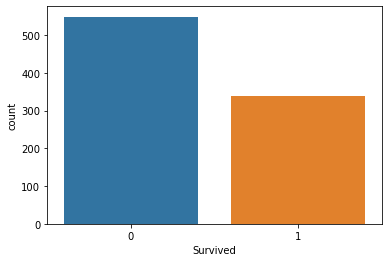

In [27]:
import seaborn as sns
sns.countplot(x= 'Survived', data=titanic_df)
plt.show()              

# here we can see that most of them did not survive. '0'-> not survived, 1-> survival        

In [28]:
# we can check the same with other features with respect to survival rate

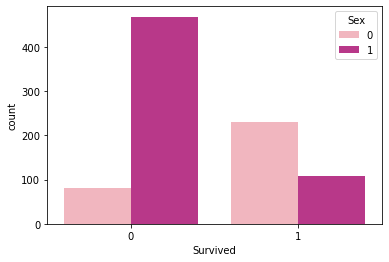

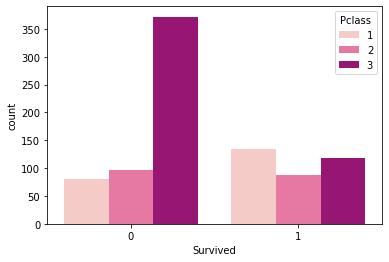

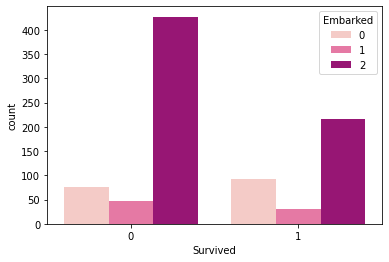

In [29]:
lst= ['Sex', 'Pclass', 'Embarked']

for i in range(len(lst)):
    sns.countplot(x= 'Survived', hue= lst[i], data= titanic_df, palette= 'RdPu')     # can use Set2,'winter, 'PuBu'
    plt.show()

In [30]:
# survival rate by 'Sex'
titanic_df.groupby('Sex')[['Survived']].mean()    # We see that 74% females survived whereas just 18% males did survive

,Survived
Sex,
0,0.740385
1,0.188908


In [31]:
# survival rate by 'Pclass'

titanic_df.groupby('Pclass')[['Survived']].mean()  # class1 people had more chances of survival

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [32]:
# survival rate by 'Embarked'

titanic_df.groupby('Embarked')[['Survived']].mean()   #Port 'C' had survived more than port 'Q', 'S'

,Survived
Embarked,
0,0.553571
1,0.389610
2,0.336957


In [33]:
# survival rate w.r.t sex and class. Lets use pivote table to display the same

titanic_df.pivot_table('Survived', index= 'Sex', columns= 'Pclass')

# females belonging to 1st Class had highest chances of survival; then comes 2nd class

Pclass,1,2,3
Sex,,,
0,0.967391,0.921053,0.500000
1,0.368852,0.157407,0.135447


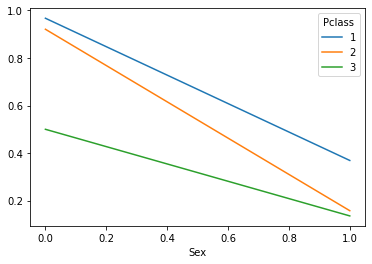

In [34]:
# lets plot this pivot table to view the visuals

titanic_df.pivot_table('Survived', index= 'Sex', columns= 'Pclass').plot()
plt.show()

In [35]:
#  we can even get a barplot for the same
# sns.barplot(x= 'Pclass', y= 'Survived', data= titanic_df )
# plt.show()

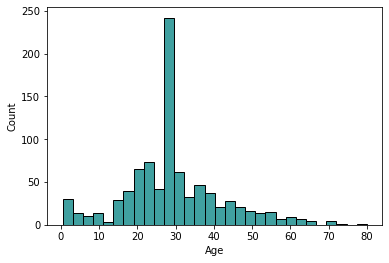

In [82]:
# histograms are helpful to plot numeric data. Lets see the distribution of age and fare with hist
# Now lets check the 'Age' and 'Fare' columns

sns.histplot(titanic_df['Age'], color= 'teal')
plt.show()       

# from this distribution we can see age group between 0-80 were in the ship and 
# age group between 28-30, the youths were more

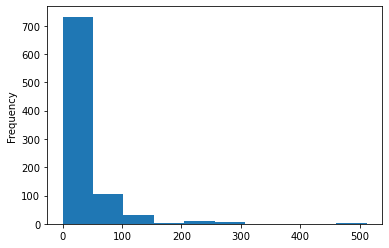

In [37]:
titanic_df.Fare.plot.hist()
plt.show()     

# here we see that there were more number of people travelling with less price less than 100

In [38]:
# Lets see females belonging to which age group and depedning on the fare price who survived the most
age= pd.cut(titanic_df.Age, [0,18,80])       #pd.cut is used to segregate/divide the range
fare= pd.cut(titanic_df.Fare, [0,50,515])    # here im using min,mean,max of fare(0,50,515) to classify
titanic_df.pivot_table('Survived', ['Sex', age, fare],'Pclass' )

Pclass                         1         2         3
Sex Age      Fare                                   
0   (0, 18]  (0, 50]    1.000000  1.000000  0.511628
             (50, 515]  0.900000       NaN       NaN
    (18, 80] (0, 50]    0.909091  0.900000  0.510204
             (50, 515]  0.985714  1.000000  0.000000
1   (0, 18]  (0, 50]         NaN  0.642857  0.215686
             (50, 515]  0.800000  0.000000       NaN
    (18, 80] (0, 50]    0.383333  0.096386  0.106762
             (50, 515]  0.346154  0.000000  0.454545

In [39]:
# fare= pd.cut(titanic_df.Fare, [0,50,515])    # here im using min,mean,max of fare to compare
# titanic_df.pivot_table('Survived', ['Sex', fare], 'Pclass')

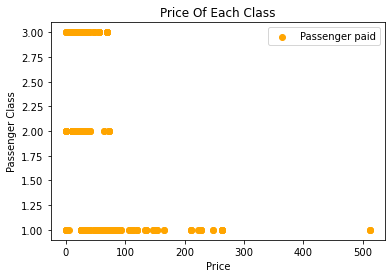

In [40]:
# lets check people belonging to different classes paid what price. 

plt.scatter(titanic_df['Fare'], titanic_df['Pclass'], color= 'orange', label= 'Passenger paid')
plt.ylabel('Passenger Class')
plt.xlabel('Price')
plt.title("Price Of Each Class")
plt.legend()
plt.show()       # we see the 1st class fare is more than 2nd and 3rd class

# From the above the visualizations and the computations following analysis is made --
 ✔ 74% Females survived ie, they were thrice more likely to survive than males  
 ✔ People from Class1 had more chances of survival than people from Class2,3
 
 ✔ People from port 'C' had more chances of survival than people belonging to port 'Q' and 'S'
 
 ✔ Females between age 18-80 and belonging to Class1 and Class2 and the one who paid more than 50     survived the most 
 
 ✔ kids between age 0-18 and belonging to Class1 survived the most 

In [41]:
# We are now completly done data wrangling/cleaning/exploring/visualizing and also the distribution of data
# Now lets get to build the model

In [42]:
print(titanic_df.Sex.unique())
print(titanic_df.Embarked.unique())
# male-> 1, female-> 0, (LE initializes in alphabetical order)
# S-> 2, C-> 0, Q-> 1

[1 0]
[2 0 1]


In [43]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [44]:
titanic_df.head(2)   # so we now have all the data in int type/float type

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [45]:
X= titanic_df.drop('Survived', axis=1)
Y= titanic_df['Survived']

X= X.values    
Y= Y.values            # to have them in array form

In [46]:
#  lets split the data to train test 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.20, random_state= 0)

In [47]:
print(len(X_train), len(X_test) )


711 178


In [48]:
X_train[:5]

array([[ 3.    ,  1.    , 28.    ,  1.    ,  0.    , 15.5   ,  1.    ],
       [ 1.    ,  0.    , 28.    ,  0.    ,  0.    , 79.2   ,  0.    ],
       [ 3.    ,  1.    , 29.    ,  1.    ,  0.    ,  7.0458,  2.    ],
       [ 2.    ,  0.    , 41.    ,  0.    ,  1.    , 19.5   ,  2.    ],
       [ 3.    ,  0.    , 22.    ,  0.    ,  0.    ,  7.775 ,  2.    ]])

In [49]:
# before getting into model we can normalize/scale the data using standards scaler 

from sklearn.preprocessing import StandardScaler
scaled= StandardScaler()
X_train= scaled.fit_transform(X_train)
X_test= scaled.fit_transform(X_test) 


In [73]:
#  Model- Would chose Decision Tree classifier for this data; We can also go with random forest, Logistic Regression or any other models also

from sklearn.tree import DecisionTreeClassifier
DT_model= DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, random_state=5)
DT_model.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=5)

In [74]:
# check the training accuracy
DT_model.score(X_train, Y_train) 

0.8129395218002813

In [75]:
# check test accuracy
DT_model.score(X_test, Y_test)

0.7303370786516854

In [76]:
#  lets predict the test set

Y_pred= DT_model.predict(X_test)
Y_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [77]:
# prediction accuracy

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
accuracy_score(Y_test, Y_pred)             # test and prediction accuracy is same so its fine

0.7303370786516854

In [78]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

Conf_Matx= confusion_matrix(Y_test, Y_pred)
Conf_Matx                     

# we see here that teh model is predicting 21 wrong non survived and 27 wrong survived 

array([[84, 21],
       [27, 46]], dtype=int64)

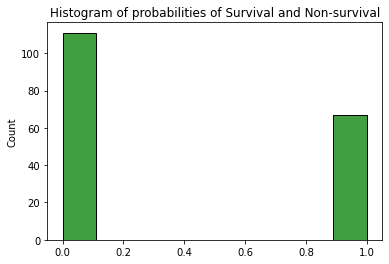

In [79]:
sns.histplot(Y_pred, color= 'green')  
plt.title('Histogram of probabilities of Survival and Non-survival')
plt.show()

# here '0' is more than '1' which means deaths are more than survival

In [80]:
#  to clearly see the performance of the model lets use classification report
print(classification_report(Y_test, Y_pred))     # this is giving 73% accuracy

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       105
           1       0.69      0.63      0.66        73

    accuracy                           0.73       178
   macro avg       0.72      0.72      0.72       178
weighted avg       0.73      0.73      0.73       178



In [81]:
# lets predict the new data; giving the column values
my_survival= [[1, 0, 28, 0, 3, 300, 0 ]]         

# will scale this
scaled_MySurv= scaled.fit_transform(my_survival)

# Predict
pred= DT_model.predict(scaled_MySurv)
print(pred)

if pred == 0:
    print("Sorry! did not survive")
else:
    print("Good! You made it")


[0]
Sorry! did not survive


# ✔  Conclusion- Deaths rates were more than survival rate. 
# Following is the accuracy acquired with Decision tree algorithm -- 
  ⨀ Train accuracy- 81%
  
  ⨀ Test accuarcy- 73%
  
  ⨀ Predicted accuracy- 73% 

In [ ]:
# We can also go with other classfication algorithms like random forest, Logistic , KNN etc.. 